In [67]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
columns = df.columns.to_list()
#these don't need cleaning for missing values
columns.remove('PRIMARY_KEY')
columns.remove('STATE')
columns.remove('YEAR')

In [6]:
#let's handle the missing values with interpolation
for column in columns:
    df[column] = df[column].interpolate()

In [7]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1491.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.267799
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.978792
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.490023
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.617766
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.849675
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [8]:
for i in range(len(df['AVG_READING_8_SCORE'])):
    if pd.isnull((df['AVG_READING_8_SCORE'][i])):
        df['AVG_READING_8_SCORE'][i] = df['AVG_READING_8_SCORE'][i + 1]

In [9]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.264844
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.978430
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.487961
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.615528
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.847503
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


1. Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.
2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?
3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?
4. What is the correlation between the overall score variable and the 1st principal component? 
5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

__1. Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.__

In [10]:
#create weights based on proportion of number of students
df['G4_Weight'] = df['GRADES_4_G'] / (df['GRADES_4_G'] + df['GRADES_8_G'])
df['G8_Weight'] = df['GRADES_8_G'] / (df['GRADES_4_G'] + df['GRADES_8_G'])

#create our new target value
df['AVG_SCORE'] = (df['AVG_READING_4_SCORE'] + df['AVG_MATH_4_SCORE']) * df['G4_Weight'] + (df['AVG_READING_8_SCORE'] + df['AVG_MATH_8_SCORE']) * df['G8_Weight']

In [11]:
df['AVG_SCORE'].describe()

count    1492.000000
mean      494.958181
std        12.356028
min       421.589227
25%       487.061392
50%       495.901521
75%       504.390294
max       529.392858
Name: AVG_SCORE, dtype: float64

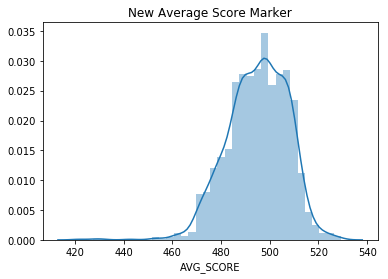

In [12]:
sns.distplot(df['AVG_SCORE'])
plt.title('New Average Score Marker')
plt.show()

In [13]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'G4_Weight', 'G8_Weight',
       'AVG_SCORE'],
      dtype='object')

__2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?__

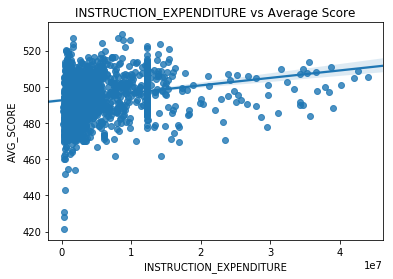

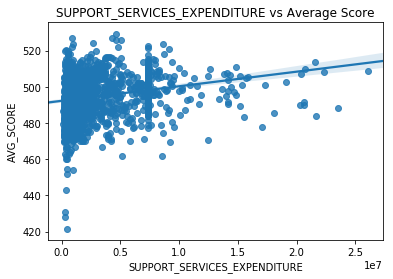

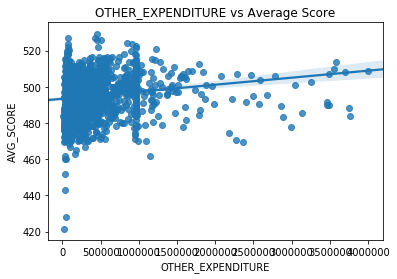

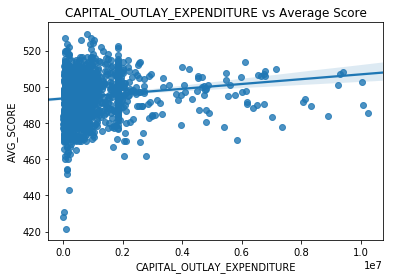

In [18]:
expenditures = ['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'AVG_SCORE']

expenditure_df = df.loc[:, expenditures]
for i in range(len(expenditure_df.columns) - 1):
    sns.regplot(x=expenditures[i], y='AVG_SCORE', data=df)
    plt.title('{} vs Average Score'.format(expenditures[i]))
    plt.show()

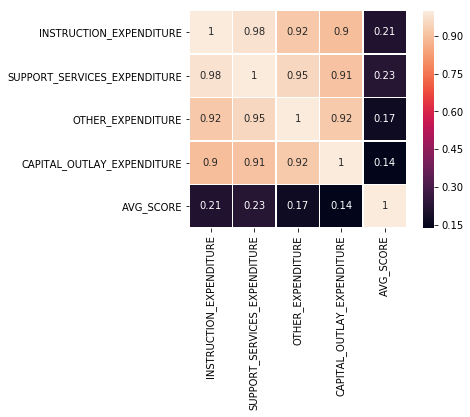

In [19]:
sns.heatmap(expenditure_df.corr(), square=True, annot=True, linewidth=0.5)

plt.show()

__3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?__

In [20]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
expenditure_df = expenditure_df.dropna()
expenditure_df.describe()

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,AVG_SCORE
count,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1456.000000
mean,5.871507e+06,3.370642e+06,5.004288e+05,1.049006e+06,495.369358
std,6.415787e+06,3.520831e+06,5.253843e+05,1.282479e+06,12.003558
min,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,421.589227
25%,1.365708e+06,7.810895e+05,1.279618e+05,2.245848e+05,487.411717
50%,3.427804e+06,1.965748e+06,3.415810e+05,6.632450e+05,496.243302
75%,9.406610e+06,5.682262e+06,8.490842e+05,1.775732e+06,504.645499
max,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,529.392858


### Am I supposed to include my 'target' in my X?

In [22]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(expenditure_df)

# The NumPy covariance function assumes that variables are represented by rows, not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.00068729 0.9798382  0.92092949 0.8961425  0.2072732 ]
 [0.9798382  1.00068729 0.95406604 0.90588729 0.22197675]
 [0.92092949 0.95406604 1.00068729 0.92410241 0.16989205]
 [0.8961425  0.90588729 0.92410241 1.00068729 0.12817469]
 [0.2072732  0.22197675 0.16989205 0.12817469 1.00068729]]


In [23]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range(len(eig_val_cov)):
    print('Eigenvalue {}: is {}'.format(i + 1, eig_val_cov[i]))

Eigenvalue 1: is 3.8384341088615868
Eigenvalue 2: is 0.9594873034162674
Eigenvalue 3: is 0.013897665324528503
Eigenvalue 4: is 0.12222768057920269
Eigenvalue 5: is 0.0693896679352515


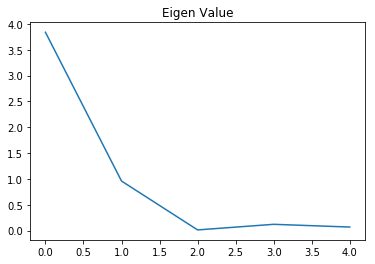

In [24]:
plt.plot(eig_val_cov)
plt.title('Eigen Value')
plt.show()

## What are the best ways to determine the n_components?

In [59]:
sklearn_pca.explained_variance_

array([3.83843411, 0.9594873 , 0.12222768, 0.06938967, 0.01389767])

## SKlearn and explained variance ratio

In [58]:
#account for 75% of the data
sklearn_pca = PCA(n_components=5)
Y = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.76715956 0.19176566 0.02442875 0.0138684  0.00277762]


It looks like the 1st component explain over 76% of the variance.

## SKLEARN and Explained Variance

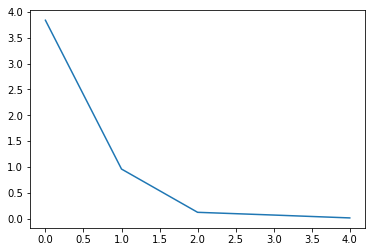

In [62]:
plt.plot(sklearn_pca.explained_variance_)
plt.show()

__4. What is the correlation between the overall score variable and the 1st principal component?__

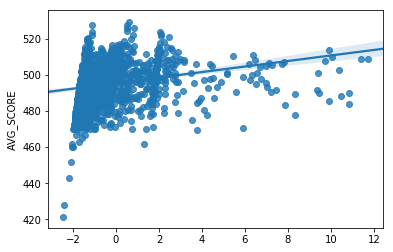

In [63]:
sns.regplot(Y[:, 0], expenditure_df['AVG_SCORE'])
plt.show()

In [71]:
corr, p_value = stats.pearsonr(Y[:, 0], expenditure_df['AVG_SCORE'])

print('The correlation between our principal component and our target variable is {} and our p-value is {}'.format(corr, p_value))

The correlation between our principal component and our target variable is 0.24954751796828942 and our p-value is 4.1522388243541907e-22


__5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?__

There seems to be a stronger correlation between our principal component and any singular variable alone (highest roughly 23%) and it has the benefit of decreased dimensionality which can help with potential overfitting.

A drawback is that this feature is much harder to interpret than the others. Is this tradeoff enough to make using the PC worthwhile?